In [1]:
!pip install sktime

import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pickle
import pandas as pd
from util import *

In [2]:
ntfm = get_problem_features()
pdf = get_problem_algorithm_performance()

In [3]:
random_indices = np.random.choice(len(ntfm), size=100000, replace=False)
X = ntfm.to_numpy()[random_indices, :]
Y = pdf.to_numpy()[random_indices, :]

print(X.shape)
print(Y.shape)

(100000, 321)
(100000, 61)


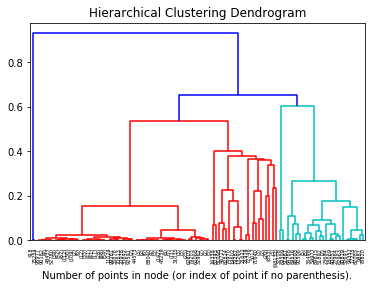

In [4]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='average')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [5]:
model = AgglomerativeClustering(n_clusters=30, affinity='cosine', linkage='average')
model.fit(X)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=30)

In [6]:
labels = model.labels_

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
clf = MLPRegressor(hidden_layer_sizes=(50))